In [2]:
import seaborn as sns

titanic = sns.load_dataset('titanic') # seaborn 내에 포함되어 있는 데이터셋을 읽어 오기
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [7]:
print(type(titanic))
titanic.info()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


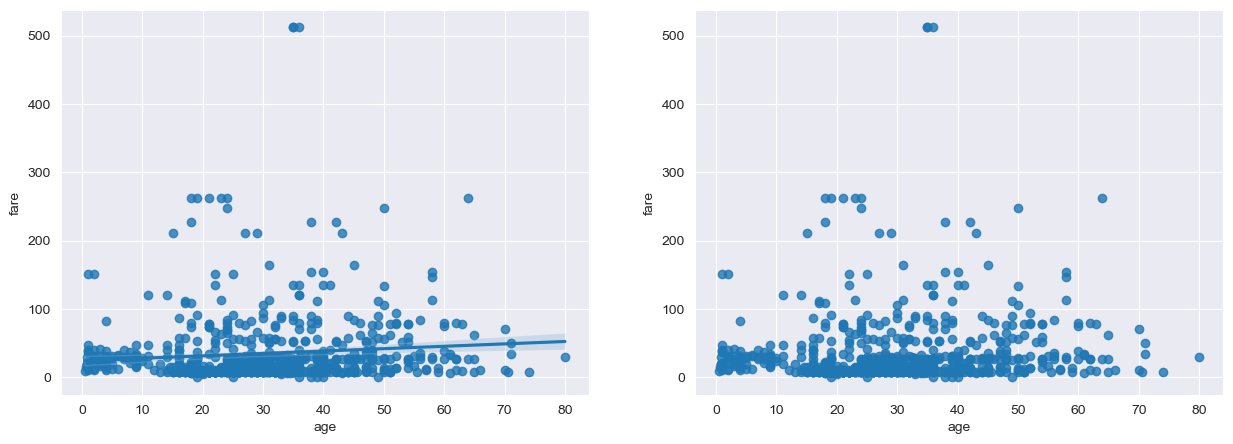

In [9]:
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

sns.regplot(x = 'age',
           y = 'fare',
           data = titanic,
           ax=ax1)

sns.regplot(x = 'age',
           y = 'fare',
           data = titanic,
           ax=ax2,
           fit_reg=False)

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


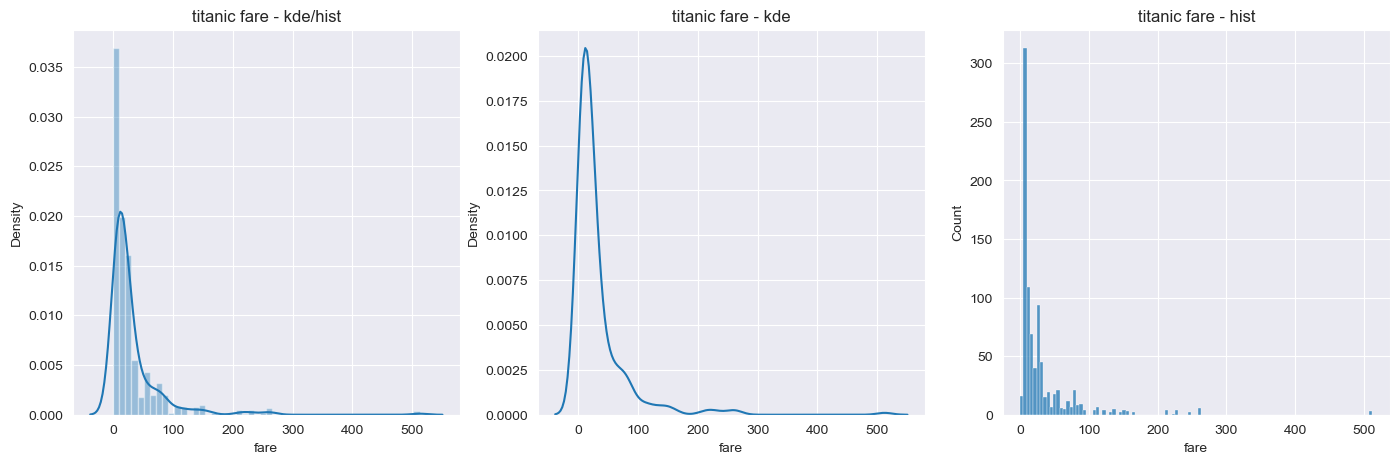

In [34]:
sns.set_style('darkgrid')

fig = plt.figure(figsize=(17, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

sns.distplot(titanic.fare, ax=ax1)
sns.kdeplot(titanic.fare, ax=ax2) # == sns.distplot(titanic.fare, ax=ax2, hist=False)
sns.histplot(titanic.fare, ax=ax3) # == sns.distplot(titanic.fare, ax=ax3, kde=False)

ax1.set_title('titanic fare - kde/hist')
ax2.set_title('titanic fare - kde')
ax3.set_title('titanic fare - hist')

plt.show()

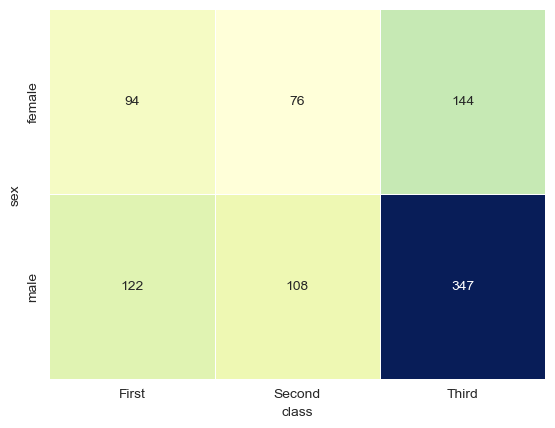

In [26]:
table = titanic.pivot_table(index=['sex'], columns=['class'], aggfunc='size')
sns.heatmap(table,           # 데이터 프레임
           annot=True,       # 데이터 값 표시여부
           fmt='d',          # 정수형 포맷
           cmap='YlGnBu',    # 컬러맵
           linewidth=.5,     # 구분선
           cbar=False)       # 컬러바 표시

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


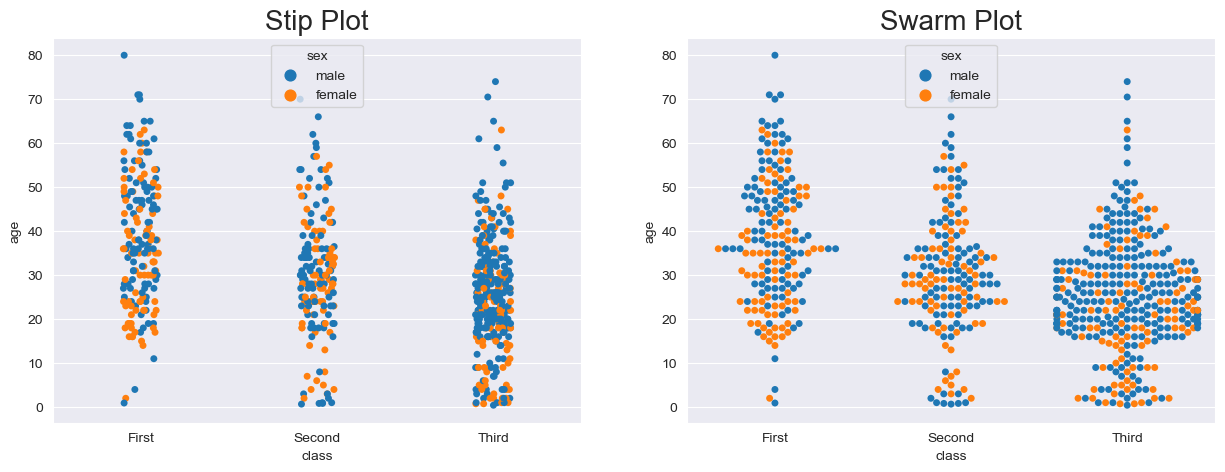

In [33]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

sns.stripplot(y='age', x='class', data=titanic, ax=ax1, hue='sex')
sns.swarmplot(y='age', x='class', data=titanic, ax=ax2, hue='sex')

ax1.set_title('Stip Plot', size=20)
ax2.set_title('Swarm Plot', size=20)

plt.show()

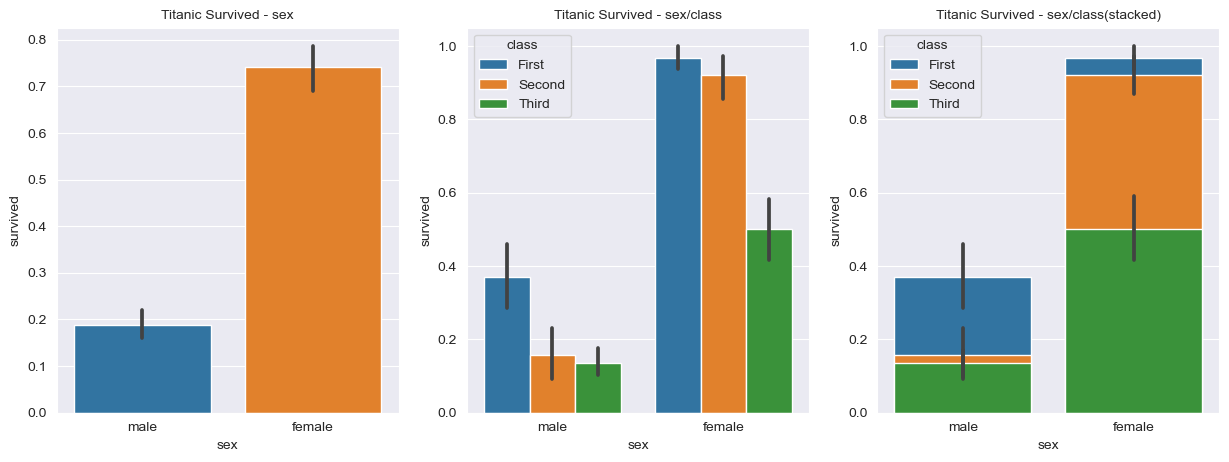

In [39]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

sns.barplot(x='sex', y='survived', data=titanic, ax=ax1)
sns.barplot(x='sex', y='survived', data=titanic, ax=ax2, hue='class')
sns.barplot(x='sex', y='survived', data=titanic, ax=ax3, hue='class', dodge=False)

ax1.set_title('Titanic Survived - sex', size=10)
ax2.set_title('Titanic Survived - sex/class', size=10)
ax3.set_title('Titanic Survived - sex/class(stacked)', size=10)

plt.show()

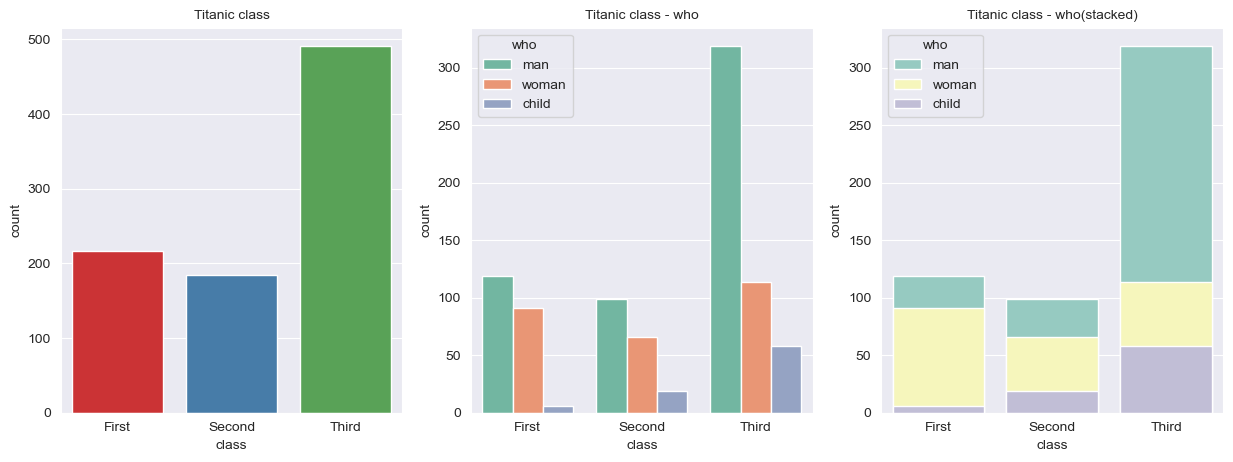

In [45]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

sns.countplot(x='class', palette='Set1', data=titanic, ax=ax1)
sns.countplot(x='class', hue='who', palette='Set2', data=titanic, ax=ax2)
sns.countplot(x='class', hue='who', palette='Set3', data=titanic, ax=ax3, dodge=False)

ax1.set_title('Titanic class', size=10)
ax2.set_title('Titanic class - who', size=10)
ax3.set_title('Titanic class - who(stacked)', size=10)

plt.show()

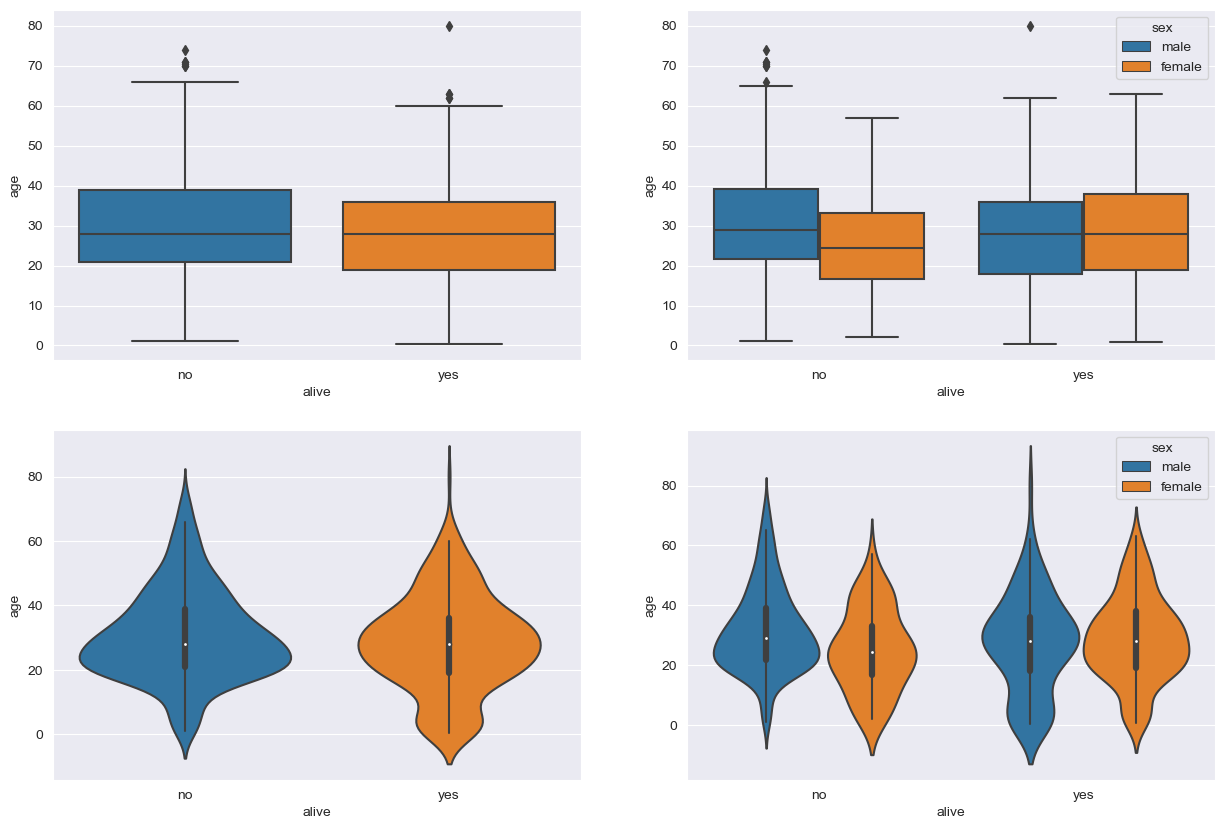

In [49]:
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)


sns.boxplot(x='alive', y='age', data=titanic, ax=ax1)
sns.boxplot(x='alive', y='age', data=titanic, ax=ax2, hue='sex')

sns.violinplot(x='alive', y='age', data=titanic, ax=ax3)
sns.violinplot(x='alive', y='age', data=titanic, ax=ax4, hue='sex')

plt.show()

<class 'seaborn.axisgrid.JointGrid'>


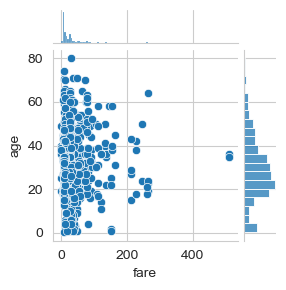

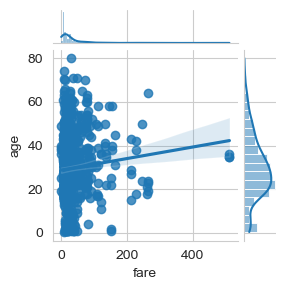

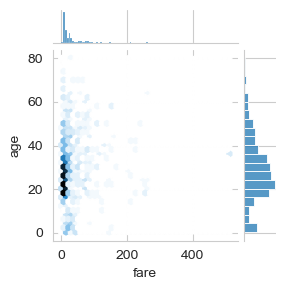

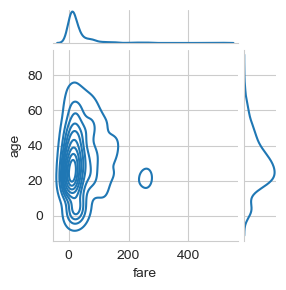

In [75]:
sns.set_style('whitegrid')

# fig = plt.figure(figsize=(15, 10))
# ax1 = fig.add_subplot(2, 2, 1)
# ax2 = fig.add_subplot(2, 2, 2)
# ax3 = fig.add_subplot(2, 2, 3)
# ax4 = fig.add_subplot(2, 2, 4)

j1 = sns.jointplot(x='fare', y='age', data=titanic, height=3)
print(type(j1))
j2 = sns.jointplot(x='fare', y='age', kind='reg', data=titanic, height=3)
j3 = sns.jointplot(x='fare', y='age', kind='hex', data=titanic, height=3)
j4 = sns.jointplot(x='fare', y='age', kind='kde', data=titanic, height=3)

# j1.fig.suptitle('titanic fare - scatter', size=15)
# j2.fig.suptitle('titanic fare - reg', size=15)
# j3.fig.suptitle('titanic fare - hex', size=15)
# j4.fig.suptitle('titanic fare - kde', size=15)

plt.show()

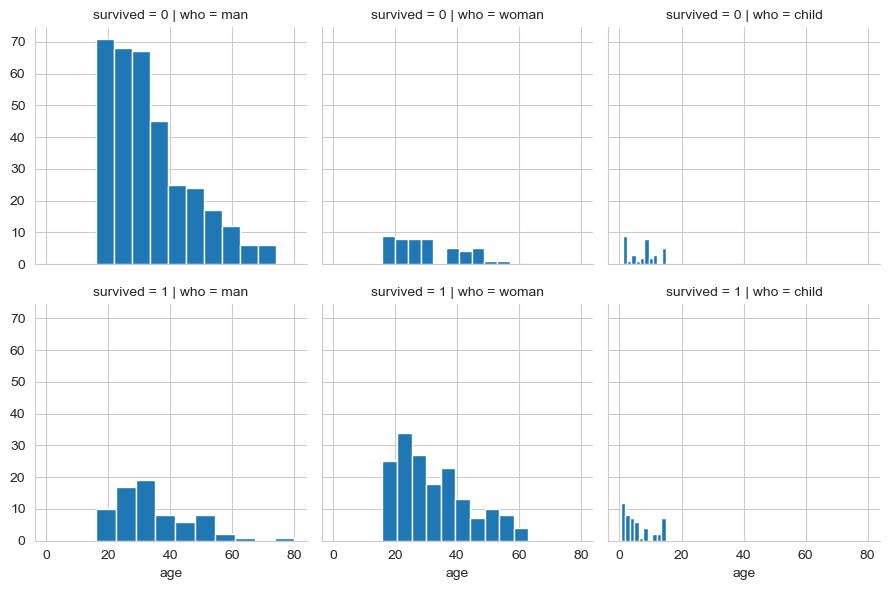

In [72]:
sns.set_style('whitegrid')

g = sns.FacetGrid(data=titanic, col='who', row='survived')
g = g.map(plt.hist, 'age')

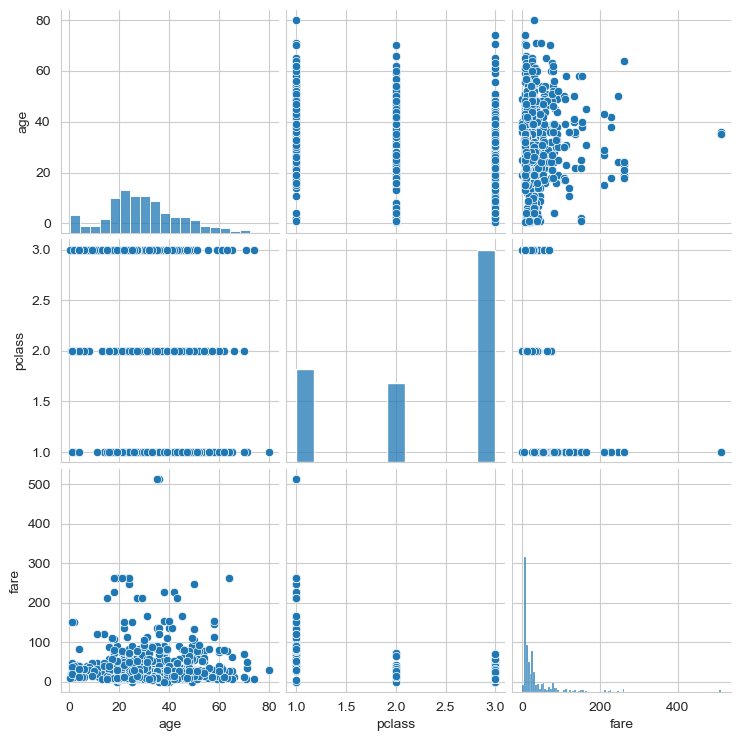

In [73]:
titanic_pair=titanic[['age', 'pclass', 'fare']]

g = sns.pairplot(titanic_pair)